In [1]:
#dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats

import datetime as dt

# Step 1 - Climate Analysis and Exploration

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy create_engine to connect to your sqlite database.

* Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Viewing data from Stations
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [10]:
# Viewing data from measurement
engine.execute('select * from measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results
    * Calculate the date 1 year ago from the last data point in the database
    * Perform a query to retrieve the data and precipitation scores
    * Save the query results as a Pandas DataFrame and set the index to the date column
    * Sort the dataframe by date
    * Use Pandas Plotting with Matplotlib to plot the data


In [11]:
#getting the last date in the datebase
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#getting the date out of the list
last_date = last_date[0]
last_date

'2017-08-23'

In [12]:
# Calculating the date 1 year ago from the last data point in the database
# one_year_ago = dt.datetime.strptime(last_date, "%Y-%m-%d") - dt.timedelta(days=366)

one_year_ago = dt.datetime.strptime(last_date, "%Y-%m-%d") - dt.timedelta(days=366)
one_year_ago = one_year_ago.strftime("%Y-%m-%d")
one_year_ago

'2016-08-22'

In [13]:
# Perform a query to retrieve the data and precipitation scores
data_prec_score = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= one_year_ago).\
                    filter(Measurement.date <= last_date).all()

data_prec_score

[('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05'

In [14]:
# Save the query results as a Pandas DataFrame
prec_df = pd.DataFrame(data_prec_score, columns=['date', 'precipitation'])

# Set the index to the date column
prec_df.set_index('date', inplace = True)

# Sort the dataframe by date
PREC_df= prec_df.sort_values(by='date', ascending = True)
PREC_df

,precipitation
date,
2016-08-22,0.40
2016-08-22,NaN
2016-08-22,2.32
2016-08-22,NaN
2016-08-22,0.94
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


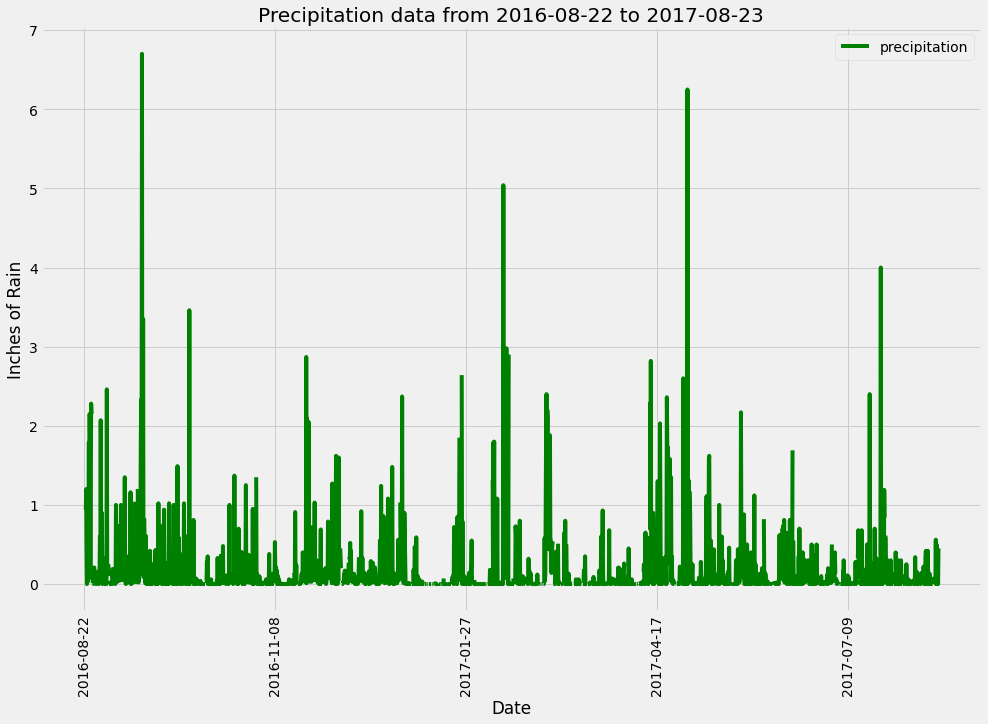

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

PREC_df.plot(color = "green", figsize=(15,10));

plt.title(f"Precipitation data from {one_year_ago} to {last_date}");
plt.xlabel('Date');
plt.ylabel("Inches of Rain");
plt.xticks( rotation="vertical")


#saving figure
plt.savefig('images/ fig 1 - Precipitation Analysis.png')

In [16]:
# summary statistics for the precipitation data
prec_df.describe()

,precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis
* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

    * List the stations and observation counts in descending order.

* Which station has the highest number of observations?

* Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

* Filter by the station with the highest number of observations.

* Plot the results as a histogram with bins=12.

In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

Most_active_station = active_stations[0][0]


sel=[func.min(Measurement.tobs),
     func.max(Measurement.tobs),
     func.avg(Measurement.tobs)]


low_high_avg_temp = session.query(*sel).filter(Measurement.station == Most_active_station).all()
low_high_avg_temp

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Choose the station with the highest number of temperature observations.

highest_temp_observation = session.query(Measurement.station, func.count(Measurement.tobs)).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.tobs).desc()).first()

highest_temp_observation = highest_temp_observation[0]
highest_temp_observation

'USC00519281'

In [21]:
# Query the last 12 months of temperature observation data for this station


#################### REFERENCE #######################
#last_date = '2017-08-23'
# one_year_ago = datetime.datetime(2016, 8, 23, 0, 0)
#####################################################


oneyear_temp = session.query(Measurement.tobs).filter(Measurement.date > one_year_ago).\
                filter(Measurement.station == highest_temp_observation).all()


#putting into Dataframe
oneyear_temp_df = pd.DataFrame(oneyear_temp, columns=['temperature'])
oneyear_temp_df

,temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


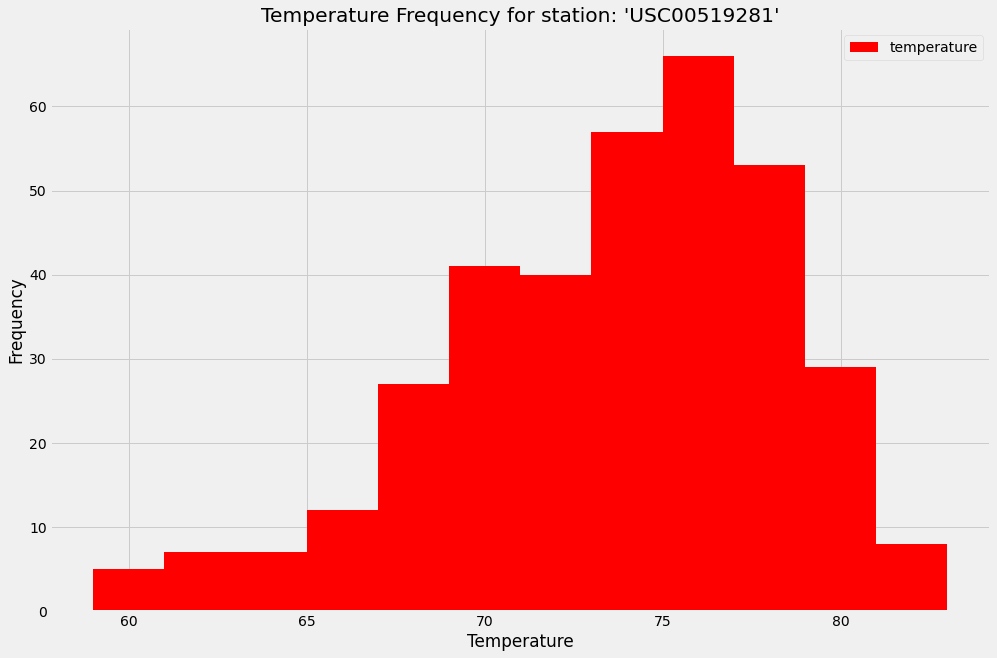

In [22]:
#plot the results as a histogram

oneyear_temp_df.plot.hist(bins = 12, color='red', figsize=(15,10));


plt.title(f"Temperature Frequency for station: '{highest_temp_observation}'");
plt.xlabel('Temperature');



#saving figure
plt.savefig('images/ fig 2 - Station Analysis.png')

## Bonus Challenge Assignment

# Temperature Analysis I
* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

* You may either use SQLAlchemy or pandas's read_csv() to perform this portion.

* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

month_qry = session.query(Measurement.station, Measurement.date, Measurement.tobs).all()

july_df = pd.DataFrame(month_qry, columns=['station id', 'date', 'temperature'])
july_df['date'] =pd.to_datetime(july_df['date']) 
july_df =july_df[july_df['date'].dt.month == 6]
july_df



,station id,date,temperature
133,USC00519397,2010-06-01,78.0
134,USC00519397,2010-06-02,76.0
135,USC00519397,2010-06-03,78.0
136,USC00519397,2010-06-04,76.0
137,USC00519397,2010-06-05,77.0
...,...,...,...
19492,USC00516128,2017-06-26,79.0
19493,USC00516128,2017-06-27,74.0
19494,USC00516128,2017-06-28,74.0
19495,USC00516128,2017-06-29,76.0


In [24]:
dec_df = pd.DataFrame(month_qry, columns=['station id', 'date', 'temperature'])
dec_df['date'] =pd.to_datetime(dec_df['date']) 
dec_df =dec_df[dec_df['date'].dt.month == 12]
dec_df


,station id,date,temperature
305,USC00519397,2010-12-01,76.0
306,USC00519397,2010-12-03,74.0
307,USC00519397,2010-12-04,74.0
308,USC00519397,2010-12-06,64.0
309,USC00519397,2010-12-07,64.0
...,...,...,...
19323,USC00516128,2016-12-27,71.0
19324,USC00516128,2016-12-28,71.0
19325,USC00516128,2016-12-29,69.0
19326,USC00516128,2016-12-30,65.0


In [25]:
# Identify the average temperature in June at all stations across all available years in the dataset. 


july_avg = july_df.groupby("station id", as_index = True).temperature.mean()
july_avg_series = pd.Series(july_avg)
july_avg_df = pd.DataFrame(july_avg_series)
july_avg_df


,temperature
station id,
USC00511918,74.139394
USC00513117,74.050847
USC00514830,76.005376
USC00516128,71.937220
USC00517948,76.655405
USC00518838,73.394737
USC00519281,73.271186
USC00519397,77.559322
USC00519523,76.668103


In [26]:
# Do the same for December temperature.
dec_avg = dec_df.groupby("station id", as_index = True).temperature.mean()
dec_avg_series = pd.Series(dec_avg)
dec_avg_df = pd.DataFrame(dec_avg_series)
dec_avg_df

,temperature
station id,
USC00511918,69.684211
USC00513117,71.069444
USC00514830,73.224719
USC00516128,69.291262
USC00517948,71.834862
USC00518838,72.421053
USC00519281,69.903226
USC00519397,71.109524
USC00519523,72.433333


In [27]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
# Will you use a paired t-test, or an unpaired t-test? Why?

print('Paired T-Test.')
print('We will see the difference in july and decemeber for the same stations')
print('')
july_p = stats.shapiro(july_avg_df['temperature'])
dec_p = stats.shapiro(dec_avg_df['temperature'])

print(july_p)
print(dec_p)



t_test= stats.ttest_rel(july_avg_df['temperature'], dec_avg_df['temperature'])
print('')
print(t_test)

print('')
print("The difference in the means is statistically significant")


Paired T-Test.
We will see the difference in july and decemeber for the same stations

ShapiroResult(statistic=0.9325559735298157, pvalue=0.5060582756996155)
ShapiroResult(statistic=0.9419207572937012, pvalue=0.602258026599884)

Ttest_relResult(statistic=6.95696617044294, pvalue=0.00011759380231523222)

The difference in the means is statistically significant


# Temperature Analysis II
* The starter notebook contains a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d. The function will return the minimum, average, and maximum temperatures for that range of dates.

* Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

* Plot the min, avg, and max temperature from your previous query as a bar chart.

* Use the average temperature as the bar height.

* Use the peak-to-peak (TMAX-TMIN) value as the y error bar (YERR).

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.date(2017, 1, 10) - dt.timedelta(days=365)
end_date = dt.date(2017, 1, 20) - dt.timedelta(days=365)

trip = calc_temps(start_date, end_date)

#putting into dataframe
trip_df = pd.DataFrame(trip, columns=['Tmin','Tavg','Tmax'])
trip_min = trip_df['Tmin']
trip_max = trip_df['Tmax']
trip_avg = trip_df['Tavg']

trip_df

,Tmin,Tavg,Tmax
0,61.0,68.584615,77.0


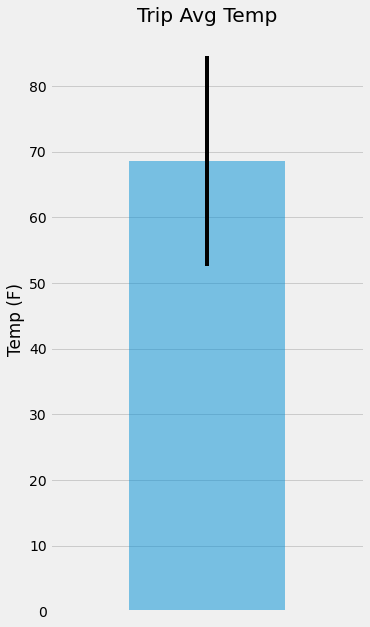

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_df.plot(kind='bar', y="Tavg", 
             yerr = trip_max - trip_min, 
             align = "center",
             figsize =(5,10),
             alpha = 0.5,
             legend = None)

plt.title("Trip Avg Temp")
plt.xticks([])
plt.ylabel('Temp (F)')

#saving figure
plt.savefig('images/ fig 3 - Temperature Analysis II.png')

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
rainfall_amount = func.sum(Measurement.prcp)

# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel=[Measurement.station,
     Station.name,
     rainfall_amount,
     Station.latitude,
     Station.longitude,
     Station.elevation]


rainfall_station = session.query(*sel).\
                        filter(Measurement.station == Station.station).\
                        filter(Measurement.date >= start_date).\
                        filter(Measurement.date <= end_date).\
                        group_by(Measurement.station).\
                        order_by(func.sum(Measurement.prcp).desc()).all();


         
rainfall_station_df = pd.DataFrame(rainfall_station, columns=["Station Id", "Station Name", "Rainfall", "Latitude", "Longitude", "Elevation"])
rainfall_station_df

,Station Id,Station Name,Rainfall,Latitude,Longitude,Elevation
0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.80,21.52130,-157.83740,7.0
1,USC00519281,"WAIHEE 837.5, HI US",0.52,21.45167,-157.84889,32.9
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.39,21.33556,-157.71139,19.5
3,USC00513117,"KANEOHE 838.1, HI US",0.38,21.42340,-157.80150,14.6
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.11,21.33310,-157.80250,152.4
5,USC00519397,"WAIKIKI 717.2, HI US",0.01,21.27160,-157.81680,3.0
6,USC00517948,"PEARL CITY, HI US",0.00,21.39340,-157.97510,11.9


# Daily Rainfall Average
* Calculate the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

* You are provided with a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic TOBS that match that date string.

* Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.

* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

* Use Pandas to plot an area plot (stacked=False) for the daily normals.

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
#################### REFERENCE #############################
# start_date = dt.date(2017, 1, 10) - dt.timedelta(days=365)
# end_date = dt.date(2017, 1, 20) - dt.timedelta(days=365)
############################################################

# Use the start and end date to create a range of dates
trip_dates = session.query(Measurement.date).\
                    filter(Measurement.date >= start_date).\
                    filter(Measurement.date <= end_date).\
                    order_by(Measurement.date.asc()).distinct().all()



# Stip off the year and save a list of %m-%d strings

#converting the qry results into strign by passing into dataframe
trip_dates_df = pd.DataFrame(trip_dates)

#slicing the string
trip_md_dates = trip_dates_df['date'].str.slice(start=5)


# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_md_dates:
    normals.append(*daily_normals(date))
    

print(len(normals))
normals


11


[(57.0, 67.3103448275862, 78.0),
 (57.0, 67.4074074074074, 81.0),
 (57.0, 67.25454545454545, 77.0),
 (58.0, 69.52631578947368, 77.0),
 (56.0, 69.31372549019608, 78.0),
 (54.0, 68.62962962962963, 80.0),
 (61.0, 69.07407407407408, 76.0),
 (57.0, 68.63157894736842, 77.0),
 (60.0, 68.26315789473684, 78.0),
 (61.0, 68.86666666666666, 78.0),
 (61.0, 70.14545454545454, 76.0)]

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_rain_df = pd.DataFrame(normals, columns=['Tmin', 'Tavg', 'Tmax'])
daily_rain_df['Date'] = trip_dates_df['date']
daily_rain_df.set_index(['Date'], inplace=True)
daily_rain_df

,Tmin,Tavg,Tmax
Date,,,
2016-01-11,57.0,67.310345,78.0
2016-01-12,57.0,67.407407,81.0
2016-01-13,57.0,67.254545,77.0
2016-01-14,58.0,69.526316,77.0
2016-01-15,56.0,69.313725,78.0
2016-01-16,54.0,68.629630,80.0
2016-01-17,61.0,69.074074,76.0
2016-01-18,57.0,68.631579,77.0
2016-01-19,60.0,68.263158,78.0


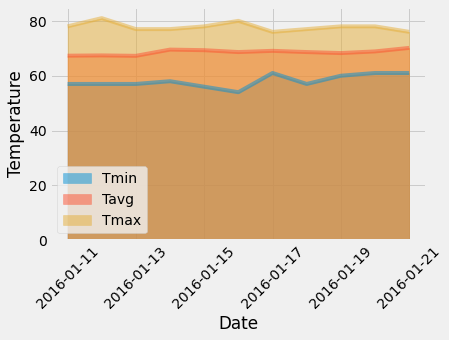

In [36]:
# Plot the daily normals as an area plot with `stacked=False`
daily_rain_df.plot(kind="area", stacked=False)
plt.ylabel('Temperature')
plt.xticks(rotation=45)

#saving figure
plt.savefig('images/ fig 4 - Stacked Area Plot.png')
